In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('drug200.csv')

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [4]:
df.shape

(200, 6)

[]

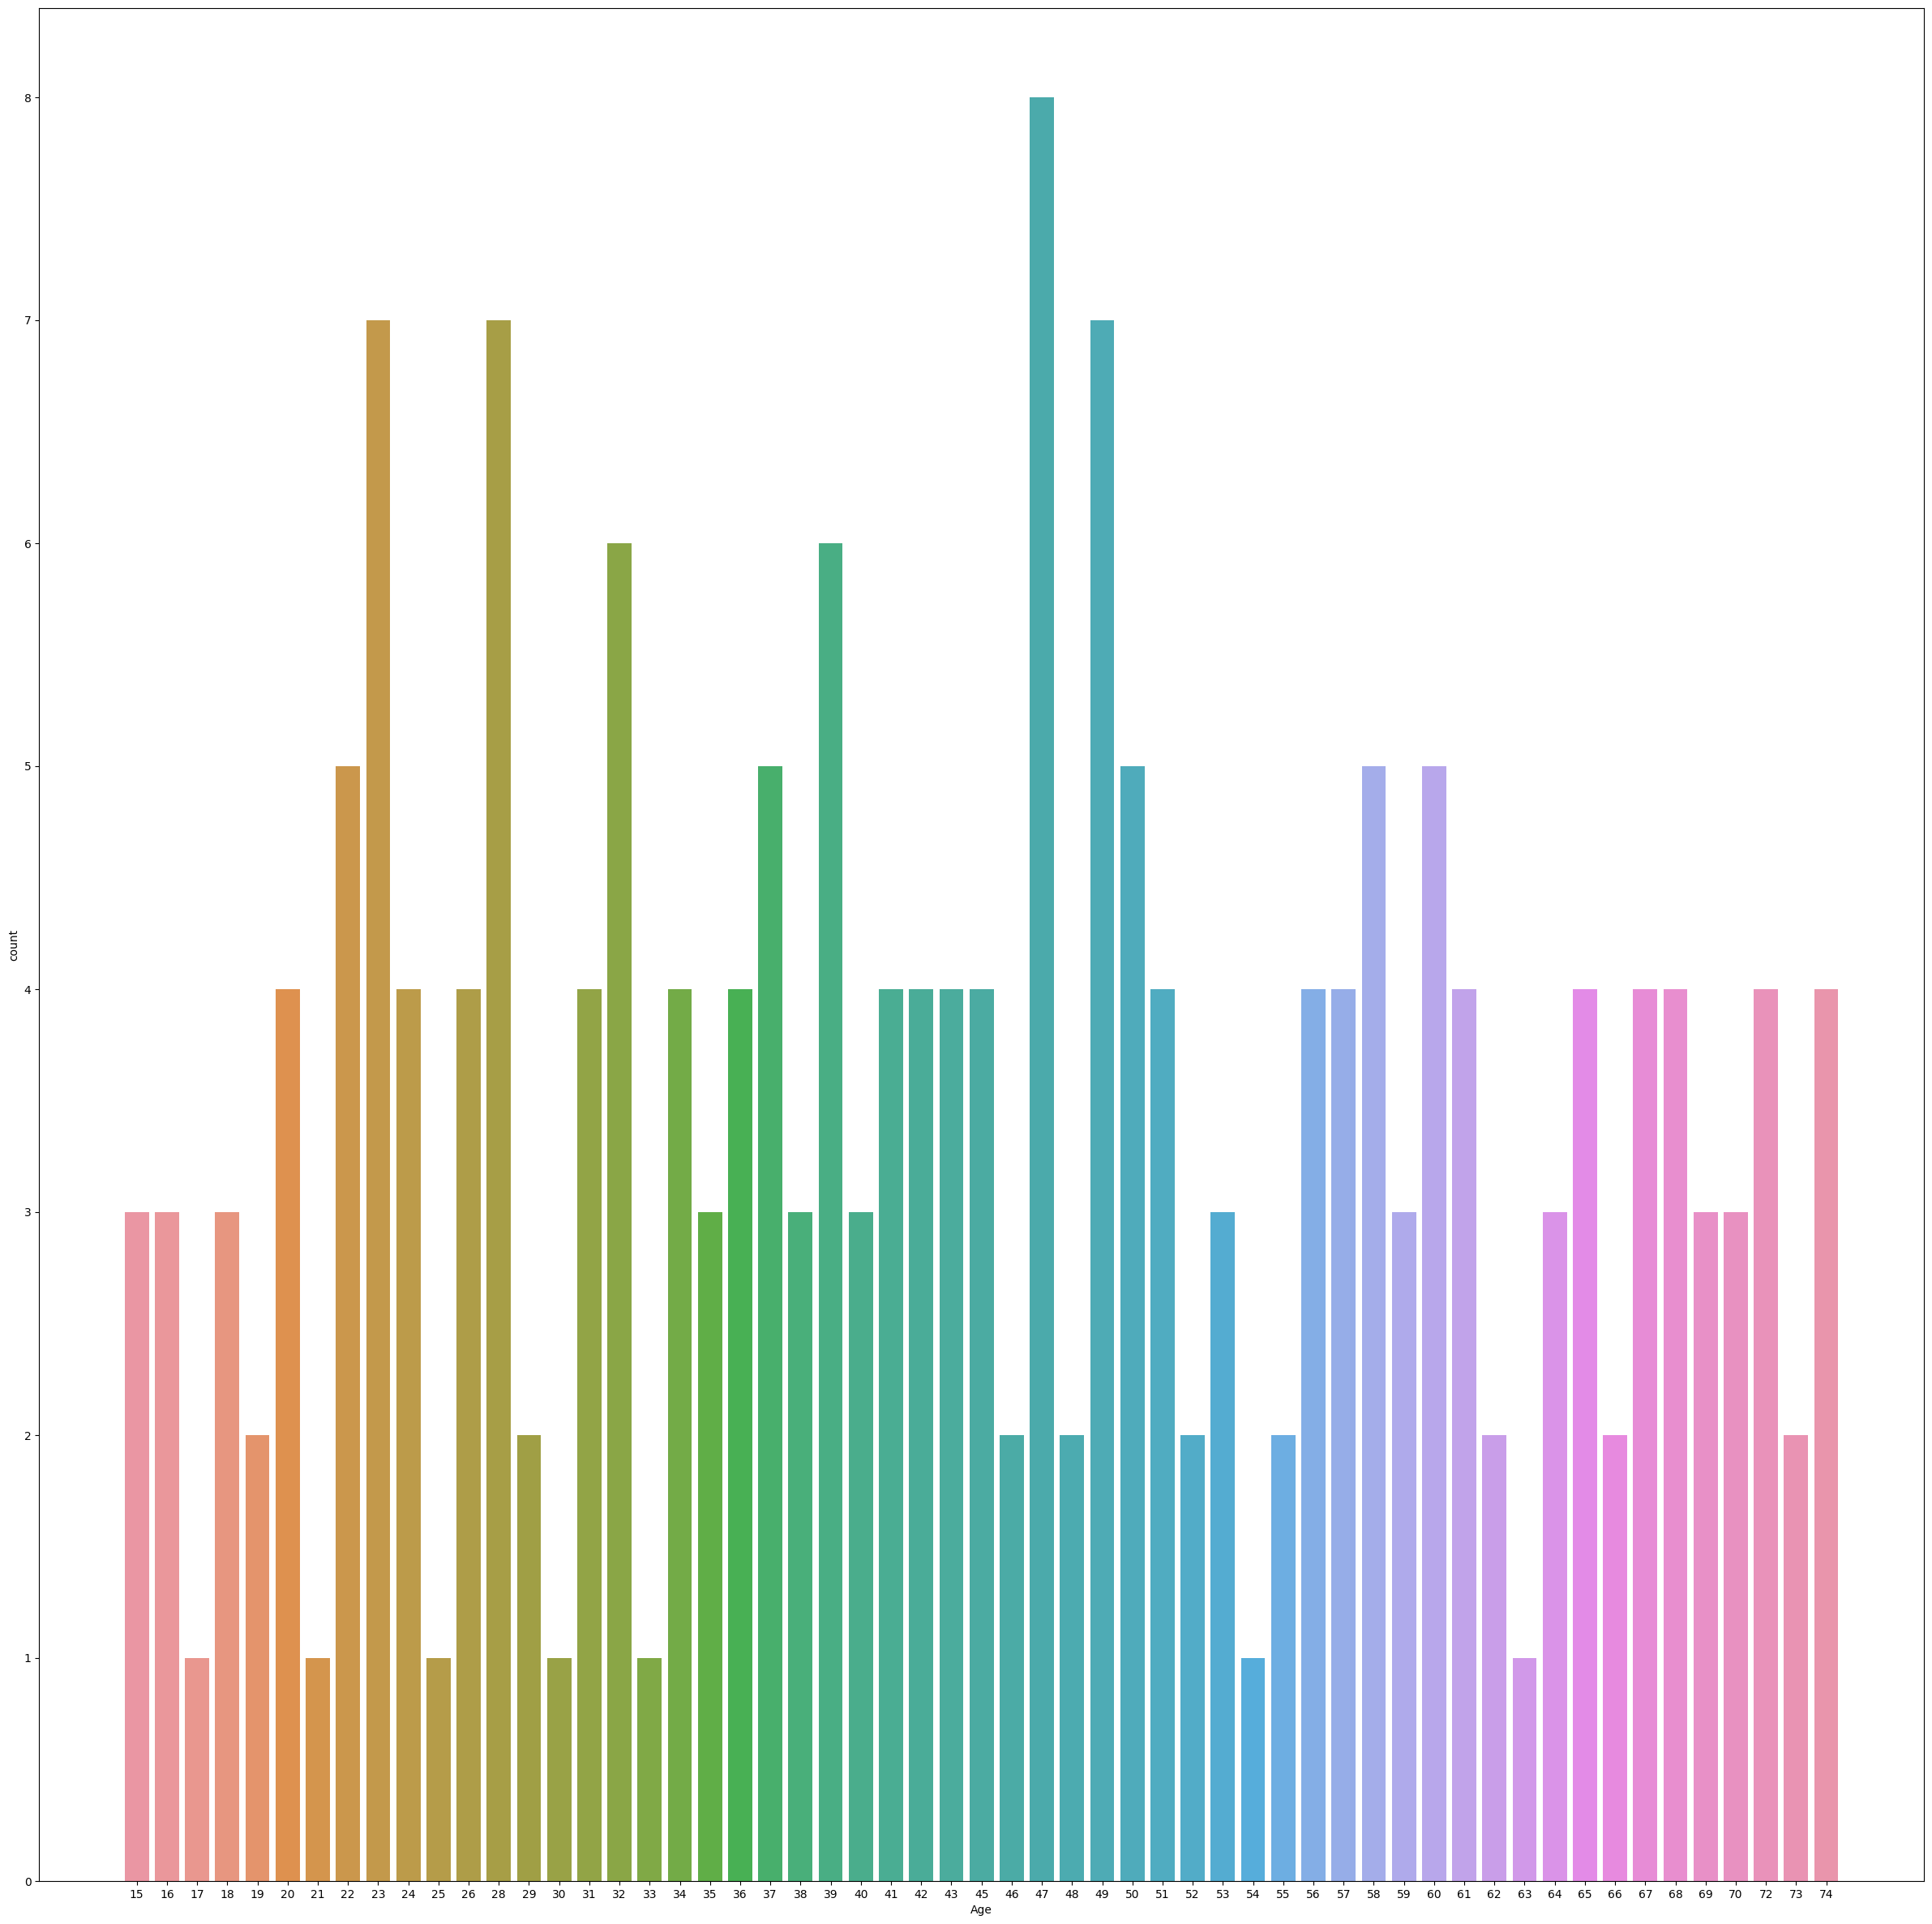

In [7]:
plt.figure(figsize = (30, 30))
sns.countplot(x = 'Age', data = df)
plt.plot()

Conclusion: People in their mid-20s and 40s have been diagnosed with the drugs.

[]

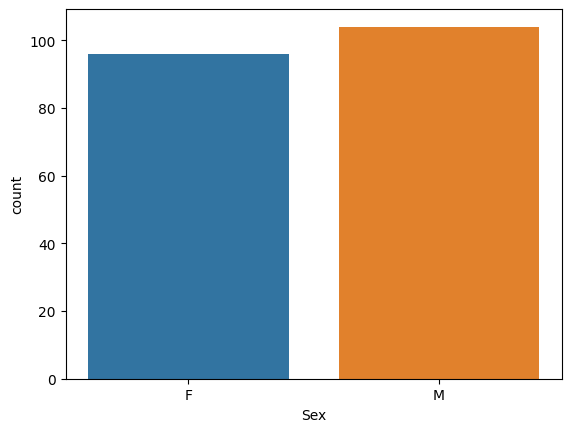

In [8]:
sns.countplot(x = 'Sex', data = df)
plt.plot()

Conclusion: There is a little difference between the male and female patients who got the drugs.

In [9]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [10]:
bp_values = df['BP'].value_counts()

bp_values

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

People with HIGH BP got the most drugs, followed by low and the normal

In [12]:
cholestrol_values = df['Cholesterol'].value_counts()
cholestrol_values

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [13]:
sex_to_drug = pd.crosstab(df['Sex'], df['Drug'])
sex_to_drug

Drug,DrugY,drugA,drugB,drugC,drugX
Sex,,,,,
F,47,9,6,7,27
M,44,14,10,9,27


In [14]:
bp_to_drug = pd.crosstab(df['BP'], df['Drug'])
bp_to_drug

Drug,DrugY,drugA,drugB,drugC,drugX
BP,,,,,
HIGH,38,23,16,0,0
LOW,30,0,0,16,18
NORMAL,23,0,0,0,36


Conclusion: People with Low and Normal BP did not get DrugA, DrugB

Also DrugX is also not given to the high BP people, which indicates that DrugX is not good for High BP people.

Same with DrugC, but it is only good for the low BP people.

While DrugY is commonly used for the three classes of BP

In [15]:
chol_to_drug = pd.crosstab(df['Cholesterol'], df['Drug'])

chol_to_drug

Drug,DrugY,drugA,drugB,drugC,drugX
Cholesterol,,,,,
HIGH,47,12,8,16,20
NORMAL,44,11,8,0,34


Conclusion: People with High Cholesterol are having drugC which were not administered to people with Normal Cholesterol.

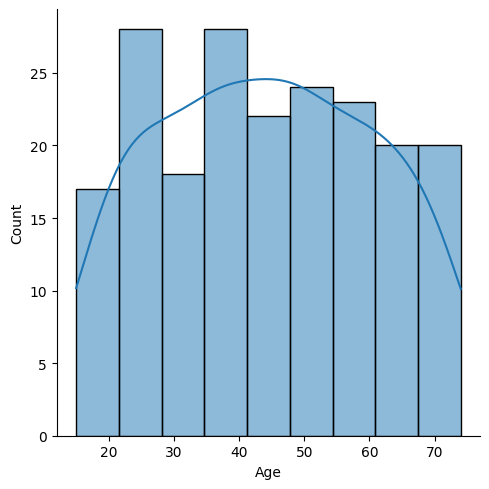

In [16]:
sns.displot(df['Age'], kde = True)

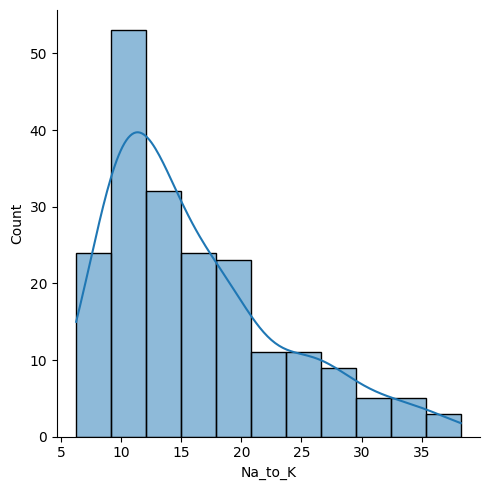

In [17]:
sns.displot(df['Na_to_K'], kde = True)

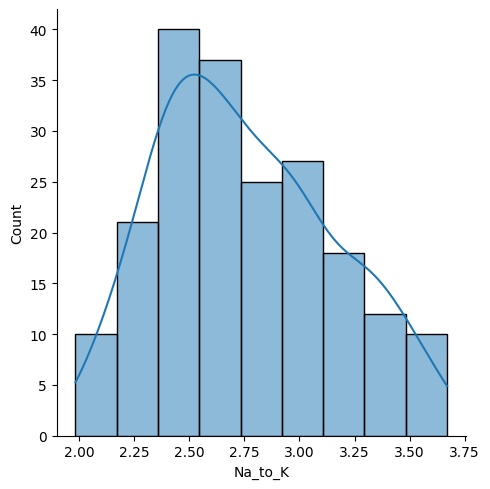

In [18]:
x = np.log(1+df['Na_to_K'])
sns.displot(x, kde = True)

In [19]:
df['Na_to_K'] = x

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,3.271658,DrugY
1,47,M,LOW,HIGH,2.645678,drugC
2,47,M,LOW,HIGH,2.408206,drugC
3,28,F,NORMAL,HIGH,2.174524,drugX
4,61,F,LOW,HIGH,2.946700,DrugY


In [20]:
from sklearn.preprocessing import LabelEncoder

encoders = []
labels = ['Sex', 'BP', 'Cholesterol']

for x in labels:
  le = LabelEncoder()
  df[x] = le.fit_transform(df[x])
  encoders.append(le)

encoders

[LabelEncoder(), LabelEncoder(), LabelEncoder()]

In [24]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,3.271658,DrugY
1,47,1,1,0,2.645678,drugC
2,47,1,1,0,2.408206,drugC
3,28,0,2,0,2.174524,drugX
4,61,0,1,0,2.946700,DrugY


In [27]:
encoders[0].inverse_transform([0,1,1])

array(['F', 'M', 'M'], dtype=object)

In [28]:
target_encode = LabelEncoder()

df['Drug'] = target_encode.fit_transform(df['Drug'])

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,3.271658,0
1,47,1,1,0,2.645678,3
2,47,1,1,0,2.408206,3
3,28,0,2,0,2.174524,4
4,61,0,1,0,2.946700,0


In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']

from sklearn.model_selection import GridSearchCV, train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 101)

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [35]:
from sklearn.metrics import classification_report

model_forest = RandomForestClassifier()

params_grid = {
    'n_estimators': [10,20,30,50,100,200,400]
}

cv1 = GridSearchCV(model_forest, params_grid)

In [36]:
cv1.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 20, 30, 50, 100, 200, 400]})

In [38]:
cv1.best_params_

{'n_estimators': 10}

In [40]:
y_pred = cv1.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         6
           3       1.00      0.67      0.80         6
           4       0.91      0.91      0.91        11

    accuracy                           0.94        50
   macro avg       0.94      0.92      0.92        50
weighted avg       0.94      0.94      0.94        50



In [44]:
model_tree = DecisionTreeClassifier()

params_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random']
}

cv2_tree = GridSearchCV(model_tree, params_grid, cv = 5)
cv2_tree.fit(x_train, y_train)

cv2_tree.best_params_

{'criterion': 'gini', 'splitter': 'best'}

In [45]:
y_pred = cv2_tree.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         6
           4       1.00      0.91      0.95        11

    accuracy                           0.98        50
   macro avg       0.99      0.98      0.99        50
weighted avg       0.98      0.98      0.98        50



In [46]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.98

In [49]:
model_neighbors = KNeighborsClassifier()

params_grid = {
    'n_neighbors': list(range(1,16))
}

cv3_neighbors = GridSearchCV(model_neighbors, params_grid, cv = 5)

cv3_neighbors.fit(x_train, y_train)

y_pred = cv3_neighbors.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        22
           1       0.67      0.80      0.73         5
           2       0.86      1.00      0.92         6
           3       1.00      0.50      0.67         6
           4       0.75      0.82      0.78        11

    accuracy                           0.82        50
   macro avg       0.83      0.80      0.79        50
weighted avg       0.83      0.82      0.82        50



Here, we got the best accuracy score from the Decision Tree Classifier with an accuracy score of 98%

In [50]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [56]:
def predict_drug():
  age = int(input("Enter your age"))
  gender = input("Enter your gender")
  BP = input("Enter your BP level")
  Cholesterol = input("Enter your cholesterol level")
  Na_to_K = float(input("Enter your Sodium to Potassium Ratio"))

  Na_to_K = np.log(1+Na_to_K)

  gender = encoders[0].transform(np.array([gender]))
  BP = encoders[1].transform(np.array([BP]))
  Cholesterol = encoders[2].transform(np.array([Cholesterol]))

  input_values = np.array([age, gender, BP, Cholesterol, Na_to_K])

  input_values = sc.transform(input_values.reshape(1,-1))

  value = cv2_tree.predict(input_values)
  value = target_encode.inverse_transform(value)

  print(value)


predict_drug()

Enter your age21
Enter your genderM
Enter your BP levelNORMAL
Enter your cholesterol levelNORMAL
Enter your Sodium to Potassium Ratio15.1
['DrugY']


<ipython-input-56-735b715db471>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  input_values = np.array([age, gender, BP, Cholesterol, Na_to_K])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
